# A Support Vector Machine (SVM) Classifier for less than 50 data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import seaborn as sns

# Sample data with 45 data points (randomly generated)

In [2]:
np.random.seed(42)
X = np.random.randn(45, 2) * 5
y = np.array([1 if x[0] + x[1] > 0 else 0 for x in X])

# Visualizing the data points

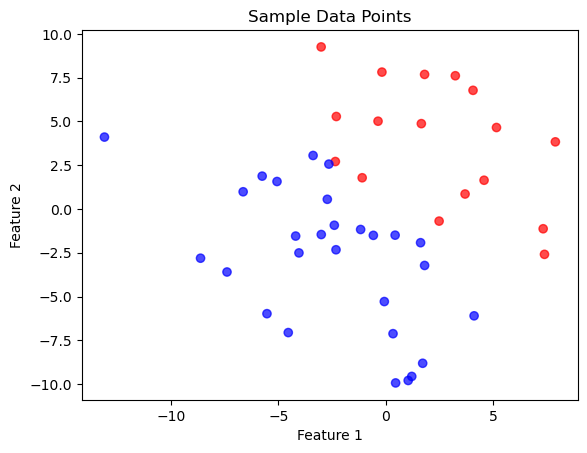

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Data Points')
plt.show()

# Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM model

In [6]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

# Sigmoid function for decision boundary

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_decision_function(X):
    return sigmoid(svm.decision_function(X))

# Predict labels for the test set

In [8]:
# Predict labels for the test set using the sigmoid-transformed decision function
y_pred = np.round(sigmoid_decision_function(X_test))
print("Predicted labels:",y_pred)

Predicted labels: [0. 0. 0. 1. 1. 1. 1. 0. 0.]


# Calculate metrics

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, sigmoid_decision_function(X_test))

# Display metrics

In [10]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


# Visualize confusion matrix

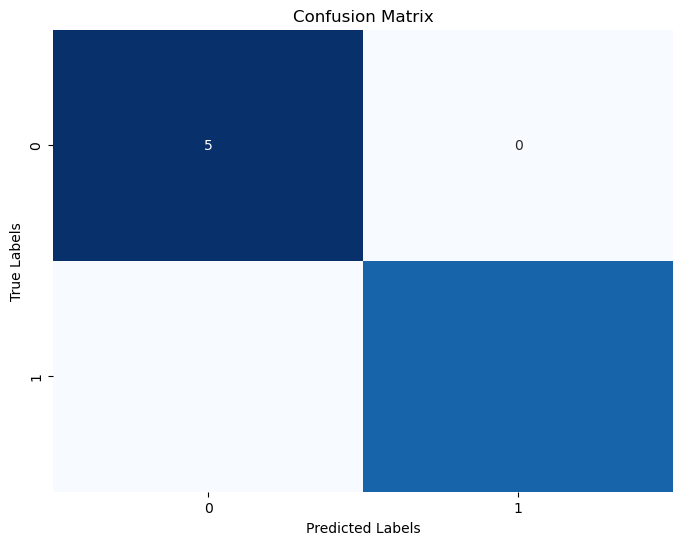

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()